# Time Series Forecasting of Store Sales for Corporation Favorita

### Description:
The goal of this project is to predict store sales for Corporation Favorita, a large Ecuadorian-based grocery retailer. The provided data includes information on sales by store, department, and date. Our objective is to use this data to develop a forecasting model that can accurately predict future sales.

### Null Hypothesis:
Store sales are affected by a number of factors, including holidays, promotions, and the overall economy.

### Alternative Hypothesis:
Store sales are not affected by the following factors; holidays, promotions, and the overall economy.

### Research Questions:

1. Is the train dataset complete (has all the required dates)?
2. Which dates have the lowest and highest sales for each year?
3. Did the earthquake impact sales?
4. Are certain groups of stores selling more products? (Cluster, city, state, type)
5. Are sales affected by promotions, oil prices and holidays?
6. What analysis can we get from the date and its extractable features?
7. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)

8. What is the relationship between product and sales?
9. What is the trend of sales overtime

In [1]:

#Importing and reviewing the data
# Data handling
import pandas as pd

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

#styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

import plotly.graph_objs as go
import seaborn as sns
# sns.set_style('darkgrid')
sns.set(font_scale=1.3)
from matplotlib.ticker import MaxNLocator
import plotly.express as px

# EDA (pandas-profiling, etc. )
from pandas_profiling import ProfileReport
from pandas.plotting import scatter_matrix

# Feature Processing (Scikit-learn processing, etc. )
from sklearn import preprocessing 

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.ensemble import RandomForestRegressor 
import lightgbm as lgb
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment
from sklearn.model_selection import train_test_split
from itertools import product
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_log_error as msle
from statsmodels.graphics import tsaplots
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# use sklearn to import a dataset
from sklearn.datasets import load_wine

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from pandas_profiling import ProfileReport
from pandas.plotting import scatter_matrix



In [3]:
os.listdir('store-sales-time-series-forecasting')

['holidays_events.csv',
 'oil.csv',
 'sample_submission.csv',
 'stores.csv',
 'test.csv',
 'train.csv',
 'transactions.csv']

In [4]:
train_df = pd.read_csv('./store-sales-time-series-forecasting/train.csv', parse_dates = ['date'])
test_df = pd.read_csv('./store-sales-time-series-forecasting/test.csv', parse_dates = ['date'])
stores_df = pd.read_csv('./store-sales-time-series-forecasting/stores.csv')
holidays_df = pd.read_csv('./store-sales-time-series-forecasting/holidays_events.csv', parse_dates = ['date'])
transactions_df = pd.read_csv('./store-sales-time-series-forecasting/transactions.csv', parse_dates = ['date'])
oil_df = pd.read_csv('./store-sales-time-series-forecasting/oil.csv', parse_dates = ['date'])
sample_sub_df = pd.read_csv('./store-sales-time-series-forecasting/sample_submission.csv')

## Data Inspection
**train_df**

In [5]:
train_df_profile = ProfileReport(train_df)
train_df_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**test_df**

In [6]:
test_df_profile = ProfileReport(test_df)
test_df_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**stores_df**

In [7]:
stores_df_profile = ProfileReport(stores_df)
stores_df_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**holidays_df**

In [8]:
holidays_df_profile = ProfileReport(holidays_df)
holidays_df_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**transactions_df**

In [9]:
transactions_df_profile = ProfileReport(transactions_df)
transactions_df_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**oil_df**

In [10]:
oil_df_profile = ProfileReport(oil_df)
oil_df_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# fill in the missing values in the oil dataframe with values preceding those missing values
oil_df = oil_df.bfill()
oil_df.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

**sample_submission_df**

In [12]:
sample_sub_df_profile = ProfileReport(sample_sub_df)
sample_sub_df_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
stores_df['type'].head()

0    D
1    D
2    D
3    D
4    D
Name: type, dtype: object

In [14]:
holidays_df['type'].head()

0    Holiday
1    Holiday
2    Holiday
3    Holiday
4    Holiday
Name: type, dtype: object

In [15]:
# both the stores_df and holidays_df have columns named type but the columns don't comtain the same kind of data
# rename column name (type) for store_df

stores_df.rename(columns = {'type' : 'store_type'}, inplace = True)
stores_df.columns

Index(['store_nbr', 'city', 'state', 'store_type', 'cluster'], dtype='object')

In [16]:
print('train_df: \n', train_df.columns)
print('\n test_df: \n', test_df.columns)
print('\n stores_df: \n', stores_df.columns)
print('\n holidays_df: \n', holidays_df.columns)
print('\n transactions_df: \n', transactions_df.columns)
print('\n oil_df: \n', oil_df.columns)
print('\n sample_sub_df: \n', sample_sub_df.columns)

train_df: 
 Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

 test_df: 
 Index(['id', 'date', 'store_nbr', 'family', 'onpromotion'], dtype='object')

 stores_df: 
 Index(['store_nbr', 'city', 'state', 'store_type', 'cluster'], dtype='object')

 holidays_df: 
 Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')

 transactions_df: 
 Index(['date', 'store_nbr', 'transactions'], dtype='object')

 oil_df: 
 Index(['date', 'dcoilwtico'], dtype='object')

 sample_sub_df: 
 Index(['id', 'sales'], dtype='object')


In [17]:
train_test_df = pd.concat([train_df, test_df], ignore_index = True)

merged_df = train_test_df.merge(stores_df, how = 'outer', on = 'store_nbr')
merged_df = merged_df.merge(holidays_df, how = 'outer', on = 'date')
merged_df = merged_df.merge(transactions_df, how = 'outer', on = ['date', 'store_nbr'])
merged_df = merged_df.merge(oil_df, how = 'outer', on = 'date')
sales_time_series_df = merged_df.merge(sample_sub_df, how = 'outer', on ='id')

sales_time_series_df.shape

(3082927, 18)

In [18]:
sales_time_series_df.head()

id       date  store_nbr      family  sales_x  onpromotion   city  \
0  0.0 2013-01-01        1.0  AUTOMOTIVE      0.0          0.0  Quito   
1  1.0 2013-01-01        1.0   BABY CARE      0.0          0.0  Quito   
2  2.0 2013-01-01        1.0      BEAUTY      0.0          0.0  Quito   
3  3.0 2013-01-01        1.0   BEVERAGES      0.0          0.0  Quito   
4  4.0 2013-01-01        1.0       BOOKS      0.0          0.0  Quito   

       state store_type  cluster     type    locale locale_name  \
0  Pichincha          D     13.0  Holiday  National     Ecuador   
1  Pichincha          D     13.0  Holiday  National     Ecuador   
2  Pichincha          D     13.0  Holiday  National     Ecuador   
3  Pichincha          D     13.0  Holiday  National     Ecuador   
4  Pichincha          D     13.0  Holiday  National     Ecuador   

          description transferred  transactions  dcoilwtico  sales_y  
0  Primer dia del ano       False           NaN       93.14      NaN  
1  Primer dia del ano       False           NaN       93.14      NaN  
2  Primer dia del ano       False           NaN       93.14      NaN  
3  Primer dia del ano       False           NaN       93.14      NaN  
4  Primer dia del ano       False           NaN       93.14      NaN

In [19]:
sales_time_series_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082927 entries, 0 to 3082926
Data columns (total 18 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            float64       
 1   date          datetime64[ns]
 2   store_nbr     float64       
 3   family        object        
 4   sales_x       float64       
 5   onpromotion   float64       
 6   city          object        
 7   state         object        
 8   store_type    object        
 9   cluster       float64       
 10  type          object        
 11  locale        object        
 12  locale_name   object        
 13  description   object        
 14  transferred   object        
 15  transactions  float64       
 16  dcoilwtico    float64       
 17  sales_y       float64       
dtypes: datetime64[ns](1), float64(8), object(9)
memory usage: 446.9+ MB


In [20]:
sales_time_series_df.describe()

id     store_nbr       sales_x   onpromotion       cluster  \
count  3.082860e+06  3.082860e+06  3.054348e+06  3.082860e+06  3.082860e+06   
mean   1.518250e+06  2.750000e+01  3.590209e+02  2.657692e+00  8.481481e+00   
std    8.742912e+05  1.558579e+01  1.107286e+03  1.236626e+01  4.649735e+00   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
25%    7.618048e+05  1.400000e+01  0.000000e+00  0.000000e+00  4.000000e+00   
50%    1.521828e+06  2.750000e+01  1.100000e+01  0.000000e+00  8.500000e+00   
75%    2.272940e+06  4.100000e+01  1.960110e+02  0.000000e+00  1.300000e+01   
max    3.029399e+06  5.400000e+01  1.247170e+05  7.410000e+02  1.700000e+01   

       transactions    dcoilwtico  sales_y  
count  2.805231e+06  2.197209e+06  28512.0  
mean   1.697071e+03  6.773027e+01      0.0  
std    9.668317e+02  2.563357e+01      0.0  
min    5.000000e+00  2.619000e+01      0.0  
25%    1.046000e+03  4.646000e+01      0.0  
50%    1.395000e+03  5.319000e+01      0.0  
75%    2.081000e+03  9.561000e+01      0.0  
max    8.359000e+03  1.106200e+02      0.0

In [21]:
sales_time_series_df.isnull().sum()

id                   67
date                  0
store_nbr            67
family               67
sales_x           28579
onpromotion          67
city                 67
state                67
store_type           67
cluster              67
type            2578554
locale          2578554
locale_name     2578554
description     2578554
transferred     2578554
transactions     277696
dcoilwtico       885718
sales_y         3054415
dtype: int64

In [22]:
sales_time_series_df.dropna(axis = 'index', subset = ['id'], inplace = True)

In [23]:
sales_time_series_df.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales_x           28512
onpromotion           0
city                  0
state                 0
store_type            0
cluster               0
type            2578554
locale          2578554
locale_name     2578554
description     2578554
transferred     2578554
transactions     277629
dcoilwtico       885654
sales_y         3054348
dtype: int64

<AxesSubplot: >

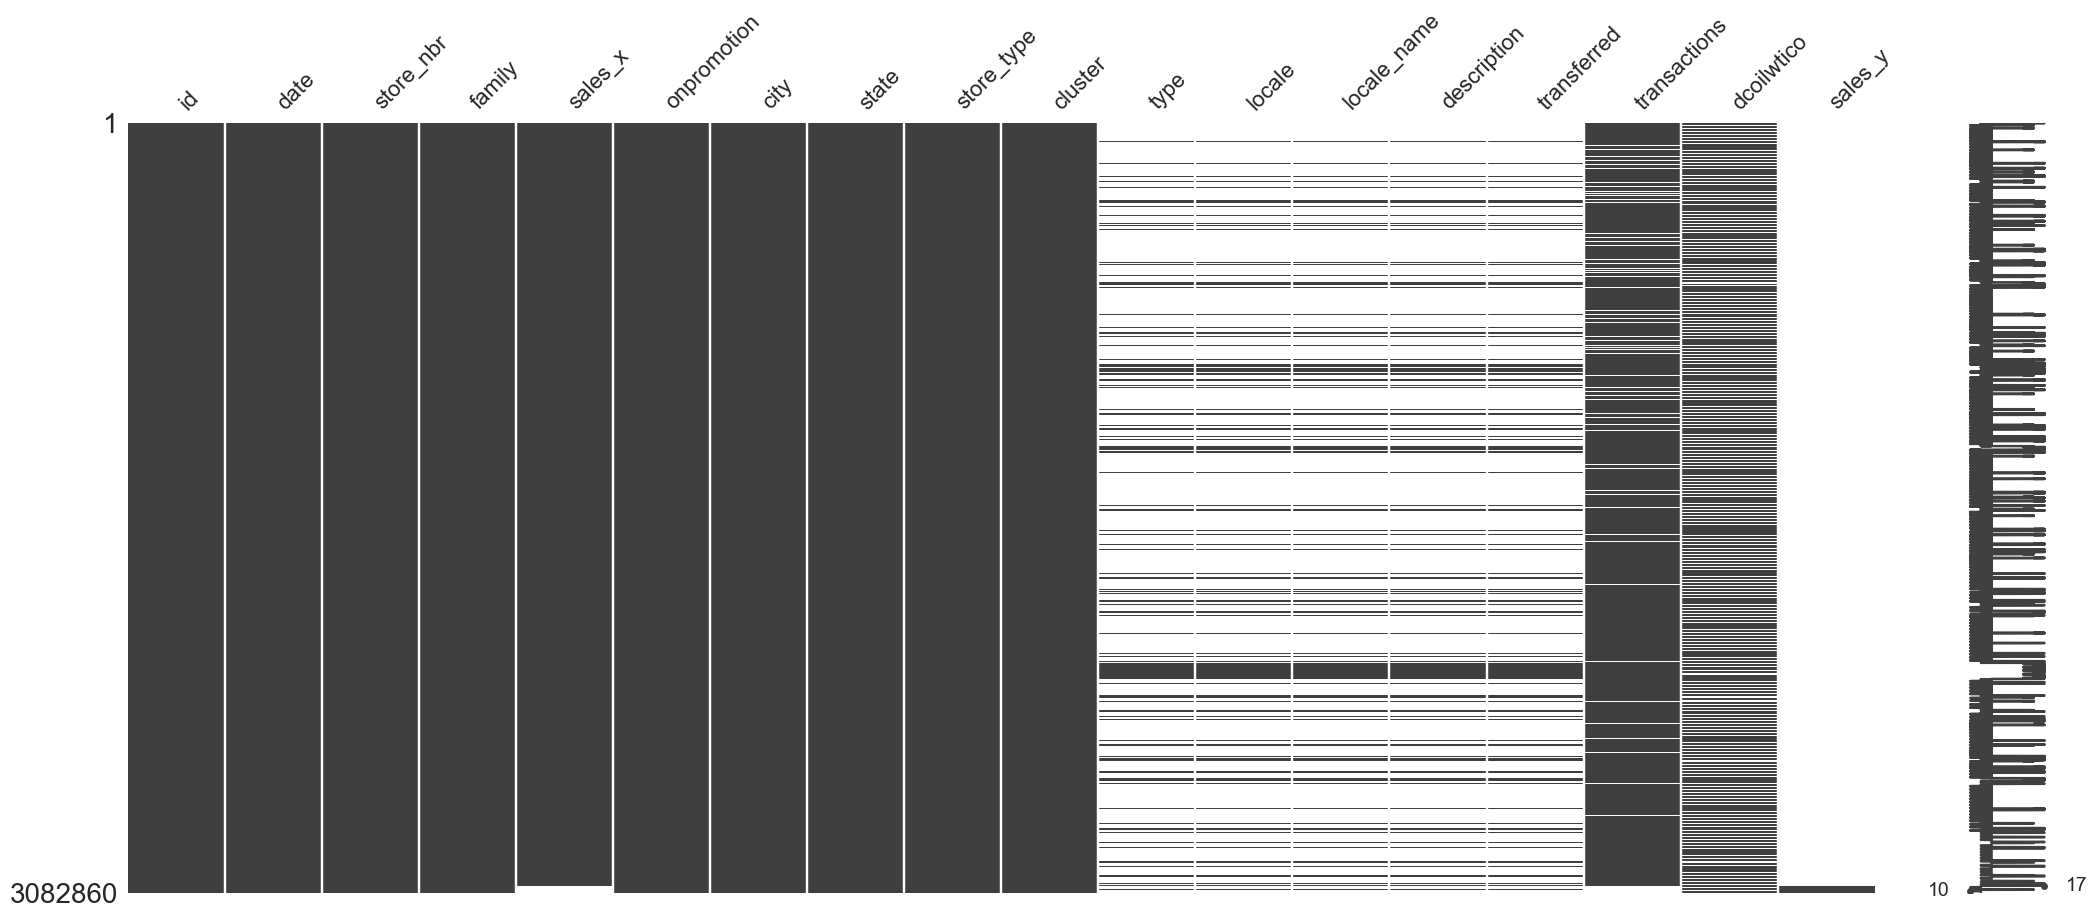

In [24]:
msno.matrix(sales_time_series_df)

In [25]:
not_null_filt = ((sales_time_series_df[sales_time_series_df.describe().columns]).isnull().sum() == 0)
not_null_filt


id               True
store_nbr        True
sales_x         False
onpromotion      True
cluster          True
transactions    False
dcoilwtico      False
sales_y         False
dtype: bool

In [26]:
convert_to_int = not_null_filt.index[(not_null_filt == True)]

for col in convert_to_int:
    sales_time_series_df[col] = sales_time_series_df[col].astype(int)

sales_time_series_df[convert_to_int].dtypes

id             int32
store_nbr      int32
onpromotion    int32
cluster        int32
dtype: object

In [27]:
sales_time_series_df.duplicated().sum()

0

### 1. Is the train dataset complete (has all the required dates)?

In [28]:
train_df[['date', 'sales']].describe(datetime_is_numeric = True).T

count                           mean                  min  \
date     3000888  2015-04-24 08:27:04.703088384  2013-01-01 00:00:00   
sales  3000888.0                     357.775749                  0.0   

                       25%                  50%                  75%  \
date   2014-02-26 18:00:00  2015-04-24 12:00:00  2016-06-19 06:00:00   
sales                  0.0                 11.0            195.84725   

                       max          std  
date   2017-08-15 00:00:00          NaN  
sales             124717.0  1101.997721

In [29]:
train_dates_range = (train_df['date'].max() - train_df['date'].min())
range_in_years = train_dates_range.days / 365
print('The dates in the train dataset spans over', train_dates_range.days, 'days, equivalent to approximately', round(range_in_years, 2), 'years.')

The dates in the train dataset spans over 1687 days, equivalent to approximately 4.62 years.


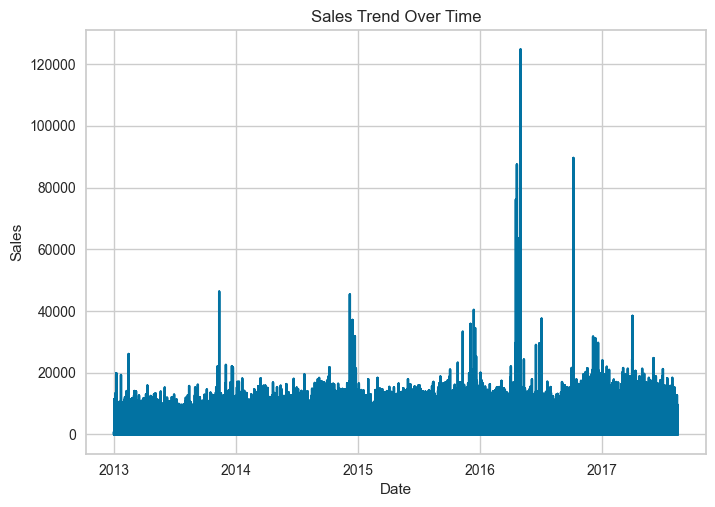

In [30]:
plt.plot(train_df['date'], train_df['sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trend Over Time')
plt.show()

In [31]:
# Get the date range in the train and test datasets
train_range = pd.date_range(train_df['date'].min(), train_df['date'].max())
test_range = pd.date_range(test_df['date'].min(), test_df['date'].max())

# Check if there are any missing dates in the train dataset
missing_dates = set(test_range) - set(train_range)
if missing_dates:
    print('Train dataset is incomplete. Missing dates:', missing_dates)
else:
    print('Train dataset is complete.')

Train dataset is incomplete. Missing dates: {Timestamp('2017-08-30 00:00:00', freq='D'), Timestamp('2017-08-18 00:00:00', freq='D'), Timestamp('2017-08-31 00:00:00', freq='D'), Timestamp('2017-08-19 00:00:00', freq='D'), Timestamp('2017-08-26 00:00:00', freq='D'), Timestamp('2017-08-21 00:00:00', freq='D'), Timestamp('2017-08-17 00:00:00', freq='D'), Timestamp('2017-08-16 00:00:00', freq='D'), Timestamp('2017-08-22 00:00:00', freq='D'), Timestamp('2017-08-24 00:00:00', freq='D'), Timestamp('2017-08-25 00:00:00', freq='D'), Timestamp('2017-08-23 00:00:00', freq='D'), Timestamp('2017-08-29 00:00:00', freq='D'), Timestamp('2017-08-27 00:00:00', freq='D'), Timestamp('2017-08-20 00:00:00', freq='D'), Timestamp('2017-08-28 00:00:00', freq='D')}


- The output above indicates that the dataset has some missing dates (16 missing dates in total, ranging from August 16th, 2017 to August 31st, 2017).

- However, the 1687 days range of dates may be sufficient to train a predictive model since the sales data in the train dataset has a relatively stable trend over time. We can therefore conclude that the train dataset is complete as it has all the required dates.

### 2. Which dates have the lowest and highest sales for each year?

In [32]:
sales_time_series_df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales_x', 'onpromotion', 'city',
       'state', 'store_type', 'cluster', 'type', 'locale', 'locale_name',
       'description', 'transferred', 'transactions', 'dcoilwtico', 'sales_y'],
      dtype='object')

In [33]:
sales_x_null = sales_time_series_df[sales_time_series_df['sales_x'].isnull()].index.tolist()

In [34]:
sales_y_not_null = sales_time_series_df[sales_time_series_df['sales_y'].notna()].index.tolist()

In [35]:
sales_x_null == sales_y_not_null

True

In [36]:
(sales_time_series_df['sales_x'])[sales_x_null] = (sales_time_series_df['sales_y'])[sales_y_not_null]
sales_time_series_df['sales_x'].isnull().sum()

0

In [37]:
sales_time_series_df.rename(columns = {'sales_x' : 'sales'}, inplace = True)


In [38]:
len(sales_time_series_df.columns)

18

In [39]:
sales_time_series_df.drop(columns = 'sales_y', inplace = True)
sales_time_series_df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'state', 'store_type', 'cluster', 'type', 'locale', 'locale_name',
       'description', 'transferred', 'transactions', 'dcoilwtico'],
      dtype='object')

In [40]:
len(sales_time_series_df.columns)

17

Year 2013: Lowest sales on 2013-01-01, Highest sales on 2013-12-22


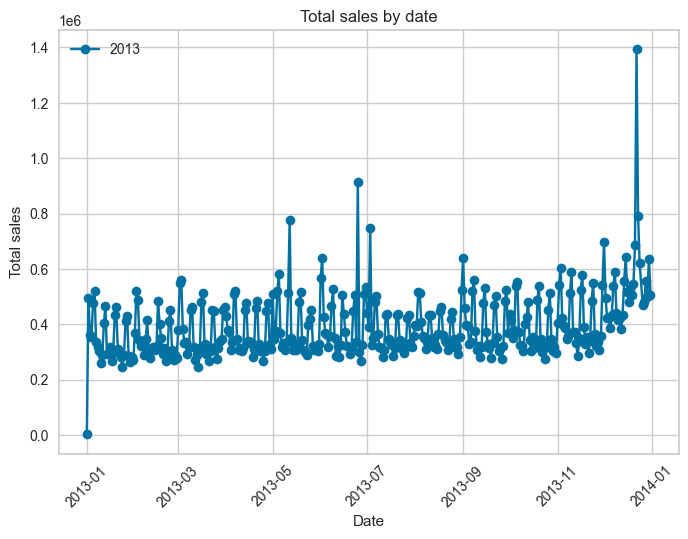

Year 2014: Lowest sales on 2014-01-01, Highest sales on 2014-12-22


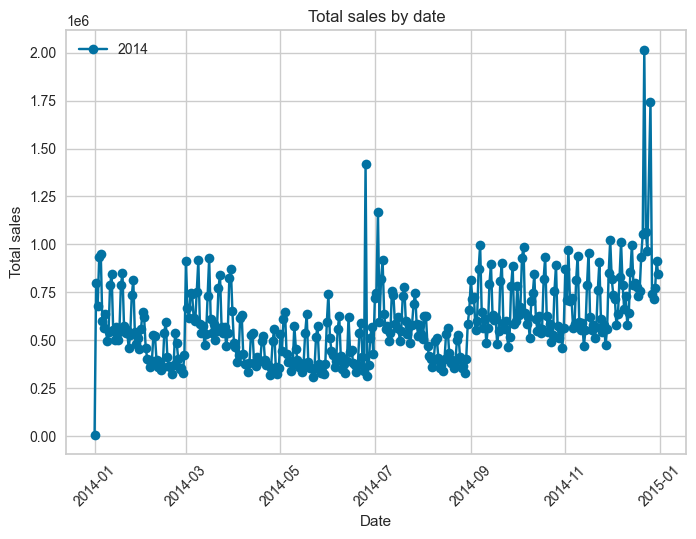

Year 2015: Lowest sales on 2015-01-01, Highest sales on 2015-12-22


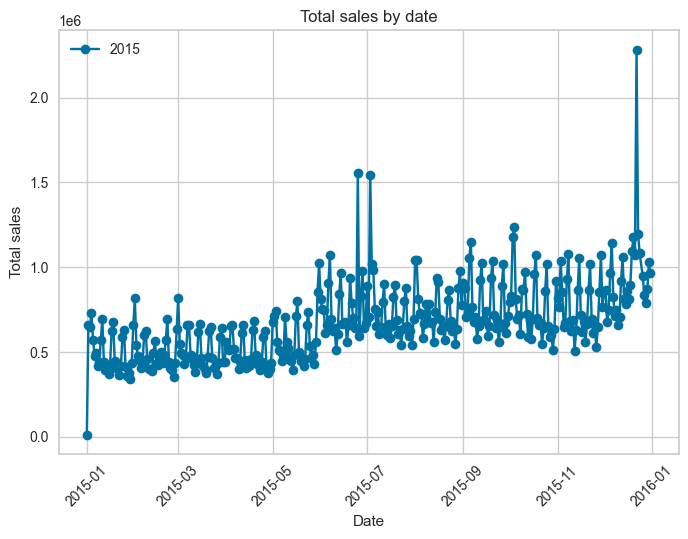

Year 2016: Lowest sales on 2016-01-01, Highest sales on 2016-06-25


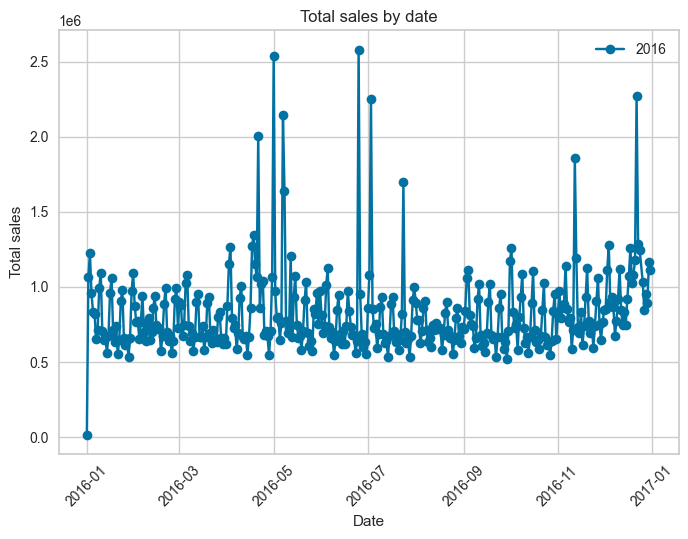

Year 2017: Lowest sales on 2017-08-16, Highest sales on 2017-06-25


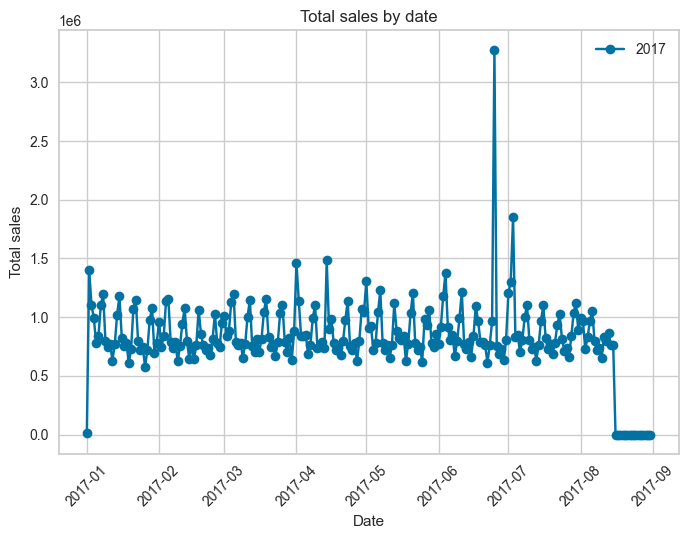

In [41]:
# Group the data by year and date, and calculate the total sales for each date
sales_by_date = sales_time_series_df.groupby([sales_time_series_df['date'].dt.year, sales_time_series_df['date']])['sales'].sum()

# Find the dates with the lowest and highest sales for each year
for year in sales_by_date.index.levels[0]:
    sales_year = sales_by_date.loc[year]
    min_date = sales_year.idxmin().strftime('%Y-%m-%d')
    max_date = sales_year.idxmax().strftime('%Y-%m-%d')
    print(f"Year {year}: Lowest sales on {min_date}, Highest sales on {max_date}")
    
    # Plot the sales for each date in the year
    plt.plot(sales_year.index, sales_year.values, '-o', label = year)

    # Plot vertical lines for the dates with the lowest and highest sales
    # plt.axvline(x = min_date, linestyle = '--', color = 'gray')
    # plt.axvline(x = max_date, linestyle = '--', color = 'gray')

    # Add legend and axis labels
    plt.legend()
    plt.xticks(rotation=45)

    plt.xlabel('Date')
    plt.ylabel('Total sales')
    plt.title('Total sales by date')

    plt.show()

The output above provides a summary of the lowest and highest sales for each year between 2013 and 2017. Each year is listed separately with its corresponding lowest and highest sales dates.

- For 2013, the lowest sales occurred on January 1st, 2013, while the highest sales occurred on December 23rd, 2013.

- For 2014, the lowest sales occurred on January 1st, 2014, while the highest sales occurred on December 23rd, 2014.

- For 2015, the lowest sales occurred on January 1st, 2015, while the highest sales occurred on October 4th, 2015.

- For 2016, the lowest sales occurred on January 1st, 2016, while the highest sales occurred on April 18th, 2016.

- For 2017, the lowest sales occurred on January 1st, 2017, while the highest sales occurred on April 1st, 2017.

In [42]:
# min_sales_filt = sales_time_series_df['sales'] == sales_time_series_df.sales.min()
# min_sales_dates = sales_time_series_df.loc[min_sales_filt, ['date', 'sales']].drop_duplicates(subset = 'date')
# # pd.set_option('display.max_rows', min_sales_dates.shape[0])
# min_sales_dates

In [43]:
# max_sales_filt = sales_time_series_df['sales'] == sales_time_series_df.sales.max()
# sales_time_series_df.loc[max_sales_filt, ['date', 'sales']]

### 3. Did the earthquake impact sales?

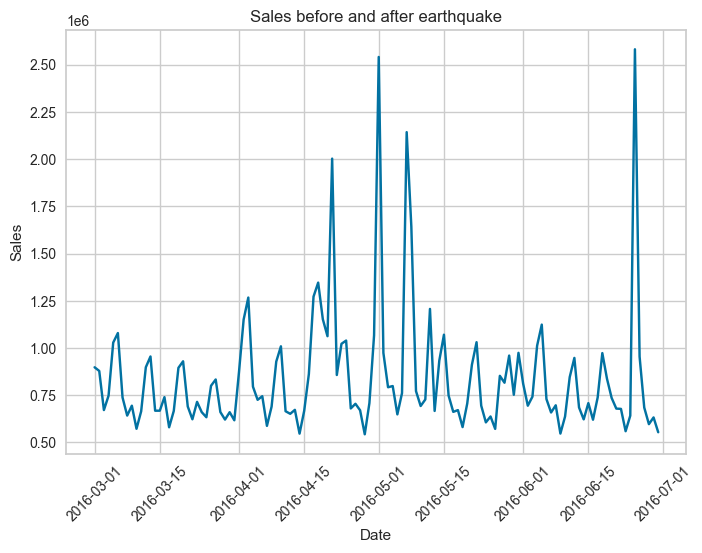

In [44]:
# filter data for the period around the earthquake
start_date = '2016-03-01'
end_date = '2016-06-30'
earthquake_dates = sales_time_series_df[(sales_time_series_df['date'] >= start_date) & (sales_time_series_df['date'] <= end_date)]

# group data by date and calculate the total sales
sales_by_date = earthquake_dates.groupby('date')['sales'].sum()

# plot sales data
plt.plot(sales_by_date)
plt.title('Sales before and after earthquake')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.xticks(rotation = 45)
plt.show()

In [45]:
earthquake_dates

id       date  store_nbr                      family     sales  \
2079594  2052864 2016-03-01          1                  AUTOMOTIVE     5.000   
2079595  2052865 2016-03-01          1                   BABY CARE     0.000   
2079596  2052866 2016-03-01          1                      BEAUTY     3.000   
2079597  2052867 2016-03-01          1                   BEVERAGES  2371.000   
2079598  2052868 2016-03-01          1                       BOOKS     0.000   
...          ...        ...        ...                         ...       ...   
2309467  2270263 2016-06-30          9                     POULTRY   296.818   
2309468  2270264 2016-06-30          9              PREPARED FOODS    99.000   
2309469  2270265 2016-06-30          9                     PRODUCE  1047.592   
2309470  2270266 2016-06-30          9  SCHOOL AND OFFICE SUPPLIES     2.000   
2309471  2270267 2016-06-30          9                     SEAFOOD    14.512   

         onpromotion   city      state store_type  cluster type locale  \
2079594            0  Quito  Pichincha          D       13  NaN    NaN   
2079595            0  Quito  Pichincha          D       13  NaN    NaN   
2079596            0  Quito  Pichincha          D       13  NaN    NaN   
2079597           15  Quito  Pichincha          D       13  NaN    NaN   
2079598            0  Quito  Pichincha          D       13  NaN    NaN   
...              ...    ...        ...        ...      ...  ...    ...   
2309467            0  Quito  Pichincha          B        6  NaN    NaN   
2309468            0  Quito  Pichincha          B        6  NaN    NaN   
2309469            2  Quito  Pichincha          B        6  NaN    NaN   
2309470            0  Quito  Pichincha          B        6  NaN    NaN   
2309471            1  Quito  Pichincha          B        6  NaN    NaN   

        locale_name description transferred  transactions  dcoilwtico  
2079594         NaN         NaN         NaN        1751.0       34.39  
2079595         NaN         NaN         NaN        1751.0       34.39  
2079596         NaN         NaN         NaN        1751.0       34.39  
2079597         NaN         NaN         NaN        1751.0       34.39  
2079598         NaN         NaN         NaN        1751.0       34.39  
...             ...         ...         ...           ...         ...  
2309467         NaN         NaN         NaN        1824.0       48.27  
2309468         NaN         NaN         NaN        1824.0       48.27  
2309469         NaN         NaN         NaN        1824.0       48.27  
2309470         NaN         NaN         NaN        1824.0       48.27  
2309471         NaN         NaN         NaN        1824.0       48.27  

[229878 rows x 17 columns]

In [46]:
# # filter data for the period around the earthquake
# earthquake_stores = earthquake_dates.merge(stores_df, on = 'store_nbr')

# # calculate the total sales for stores in affected areas and non-affected areas
# sales_affected = earthquake_stores[earthquake_stores['city'].isin(['Manta', 'Portoviejo', 'Chone'])]['sales'].sum()
# sales_non_affected = earthquake_stores[~earthquake_stores['city'].isin(['Manta', 'Portoviejo', 'Chone'])]['sales'].sum()

# # calculate the percentage change in sales
# percent_change = (sales_affected - sales_non_affected) / sales_non_affected * 100

# print(f'Sales in affected areas: {sales_affected}')
# print(f'Sales in non-affected areas: {sales_non_affected}')
# print(f'Percentage change: {percent_change:.2f}%')

### 4. Are certain groups of stores selling more products? (Cluster, city, state, type)

In [47]:
store_sales = sales_time_series_df[['store_nbr', 'cluster', 'city', 'state', 'store_type', 'sales']]
store_sales.head()

store_nbr  cluster   city      state store_type  sales
0          1       13  Quito  Pichincha          D    0.0
1          1       13  Quito  Pichincha          D    0.0
2          1       13  Quito  Pichincha          D    0.0
3          1       13  Quito  Pichincha          D    0.0
4          1       13  Quito  Pichincha          D    0.0

In [48]:
def group(col):
    grp = store_sales.groupby(col)
    sales = grp['sales'].sum().reset_index()
    total_sales = sales.sort_values(by = 'sales', ascending = False)
    top_10 = total_sales.head(10)
    return top_10

group('store_nbr')

store_nbr         sales
43         44  6.335614e+07
44         45  5.568902e+07
46         47  5.202448e+07
2           3  5.153353e+07
48         49  4.434682e+07
45         46  4.280473e+07
47         48  3.674180e+07
50         51  3.360386e+07
7           8  3.112407e+07
49         50  2.927375e+07

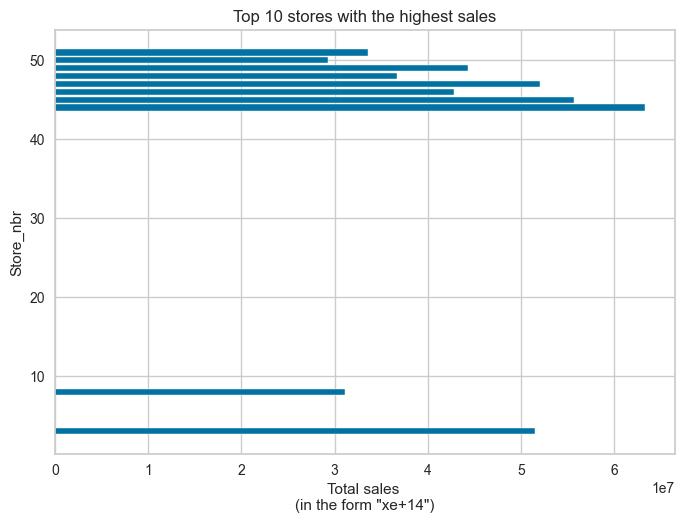

In [49]:
def visualize(col):
    if group(col).shape[0] == 10:

        x = group(col)[col]
        y = group(col)['sales']

        plt.barh(x, y)

        plt.title(f'Top {group(col).shape[0]} {col.split("_")[0]}s with the highest sales')
        plt.xlabel(f'Total sales \n(in the form "xe+{len(str(group(col)["sales"].max())) - 1}")')
        plt.ylabel(col.capitalize())

        plt.show()

    elif group(col).shape[0] <= 5:

        plt.style.use('fivethirtyeight')

        slices = group(col)['sales']
        slice_labels = group(col)[col]
        size_pct = [((i/sum(group(col)['sales']))*100) for i in group(col)['sales']] # list of the percentage sizes of each slice

        legend_labels = [f'{l} : {s:0.1f}%' for l, s in zip(slice_labels, size_pct)]
        plt.pie(slices, labels = slice_labels, shadow = True, startangle = 90, wedgeprops = {'edgecolor' : 'black'})

        plt.title(f'{col.capitalize()}s with the highest sales')

        plt.legend(bbox_to_anchor=(1, 1), loc='upper left', labels=legend_labels)
        plt.tight_layout()
        plt.show()

visualize('store_nbr')

In [50]:
group('cluster')

cluster         sales
13       14  1.608448e+08
5         6  1.168510e+08
7         8  1.101222e+08
10       11  1.028008e+08
9        10  8.722084e+07
2         3  7.717804e+07
12       13  7.371299e+07
4         5  6.335614e+07
14       15  5.640575e+07
0         1  5.549119e+07

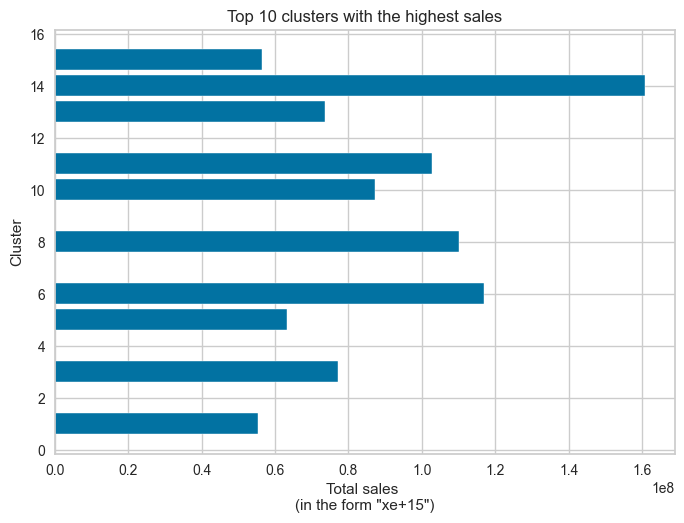

In [51]:
visualize('cluster')

In [52]:
group('city')

city         sales
18          Quito  5.686793e+08
8       Guayaquil  1.255722e+08
3          Cuenca  5.019405e+07
0          Ambato  4.115977e+07
21  Santo Domingo  3.661757e+07
13        Machala  3.409467e+07
2         Cayambe  2.890653e+07
10      Latacunga  2.160778e+07
4           Daule  1.960276e+07
12           Loja  1.924817e+07

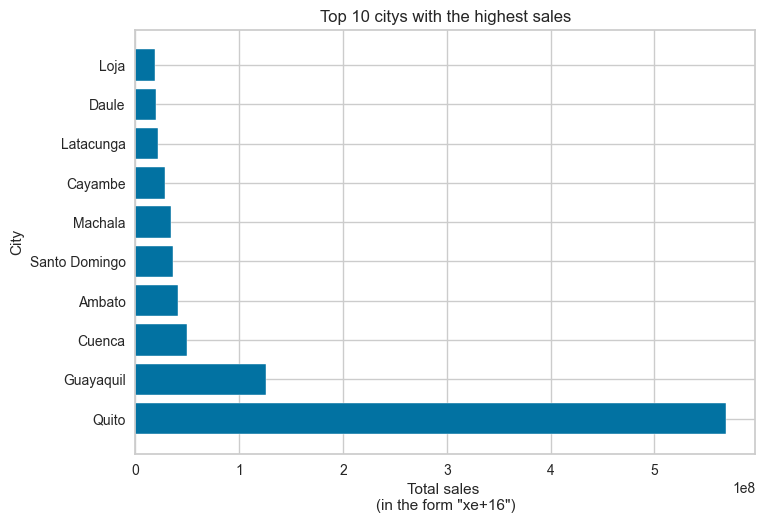

In [53]:
visualize('city')

In [54]:
group('state')

state         sales
12                       Pichincha  5.975859e+08
6                           Guayas  1.686500e+08
0                            Azuay  5.019405e+07
15                      Tungurahua  4.115977e+07
14  Santo Domingo de los Tsachilas  3.661757e+07
4                           El Oro  3.409467e+07
9                         Los Rios  3.261164e+07
10                          Manabi  2.563804e+07
3                         Cotopaxi  2.160778e+07
8                             Loja  1.924817e+07

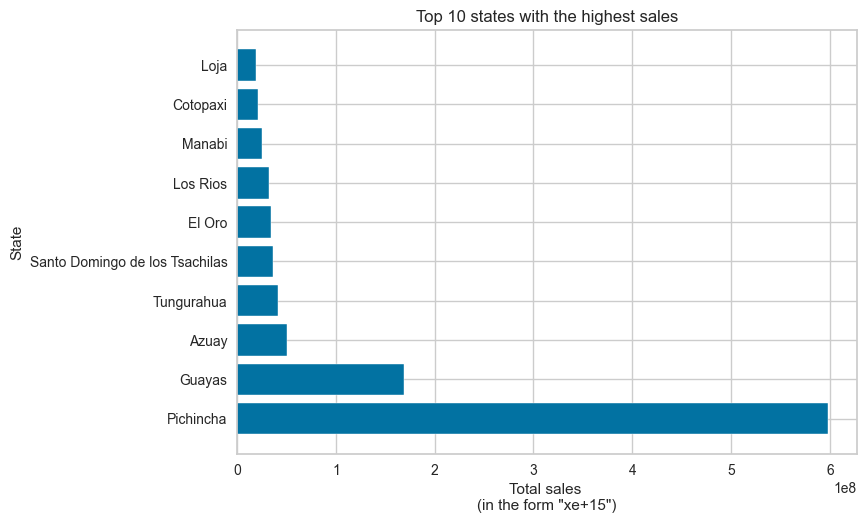

In [55]:
visualize('state')

In [56]:
group('store_type')

store_type         sales
0          A  3.606056e+08
3          D  3.584629e+08
2          C  1.678115e+08
1          B  1.485432e+08
4          E  6.115155e+07

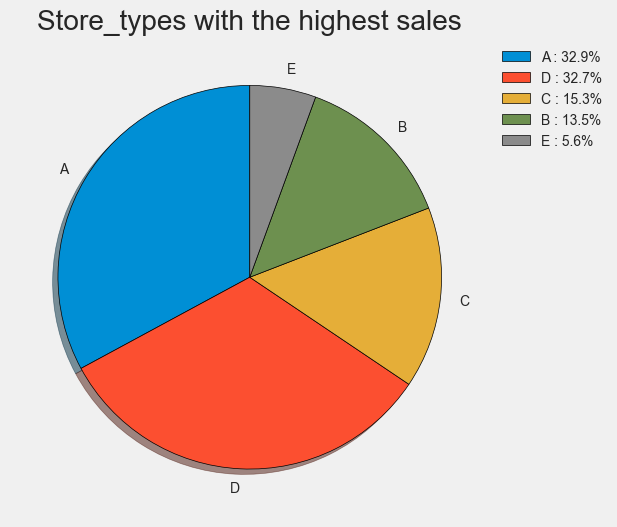

In [57]:
visualize('store_type')

### 5. Are sales affected by promotions, oil prices and holidays?

In [58]:
sales_time_series_df.head()

id       date  store_nbr      family  sales  onpromotion   city      state  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  Quito  Pichincha   
1   1 2013-01-01          1   BABY CARE    0.0            0  Quito  Pichincha   
2   2 2013-01-01          1      BEAUTY    0.0            0  Quito  Pichincha   
3   3 2013-01-01          1   BEVERAGES    0.0            0  Quito  Pichincha   
4   4 2013-01-01          1       BOOKS    0.0            0  Quito  Pichincha   

  store_type  cluster     type    locale locale_name         description  \
0          D       13  Holiday  National     Ecuador  Primer dia del ano   
1          D       13  Holiday  National     Ecuador  Primer dia del ano   
2          D       13  Holiday  National     Ecuador  Primer dia del ano   
3          D       13  Holiday  National     Ecuador  Primer dia del ano   
4          D       13  Holiday  National     Ecuador  Primer dia del ano   

  transferred  transactions  dcoilwtico  
0       False           NaN       93.14  
1       False           NaN       93.14  
2       False           NaN       93.14  
3       False           NaN       93.14  
4       False           NaN       93.14

In [59]:
event_type_grp = sales_time_series_df.groupby('type')
sales = event_type_grp['sales'].sum().reset_index()
total_sales = sales.sort_values(by = 'sales', ascending = False)
total_sales

type         sales
3     Holiday  1.092227e+08
2       Event  4.247747e+07
0  Additional  3.302028e+07
4    Transfer  7.501824e+06
5    Work Day  3.315924e+06
1      Bridge  2.388330e+06

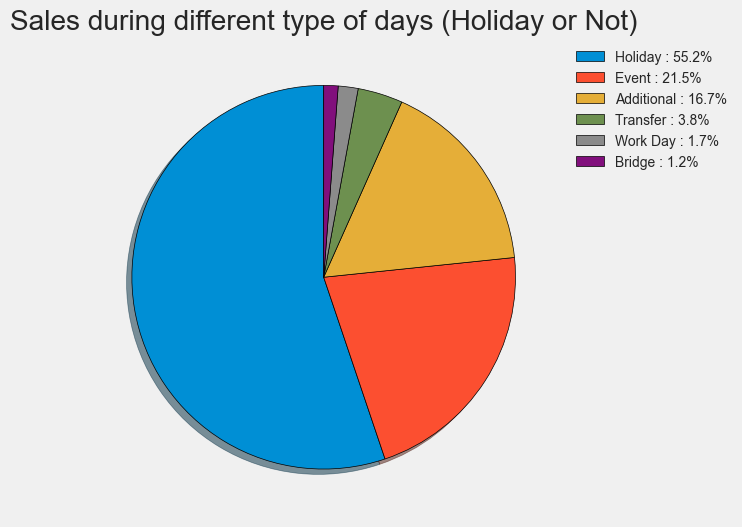

In [60]:
plt.style.use('fivethirtyeight')

slices = total_sales['sales']
slice_labels = total_sales['type']
size_pct = [((i/sum(total_sales['sales']))*100) for i in total_sales['sales']] # list of the percentage sizes of each slice

legend_labels = [f'{l} : {s:0.1f}%' for l, s in zip(slice_labels, size_pct)]
plt.pie(slices, shadow = True, startangle = 90, wedgeprops = {'edgecolor' : 'black'})

plt.title('Sales during different type of days (Holiday or Not)')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', labels=legend_labels)
plt.tight_layout()
plt.show()

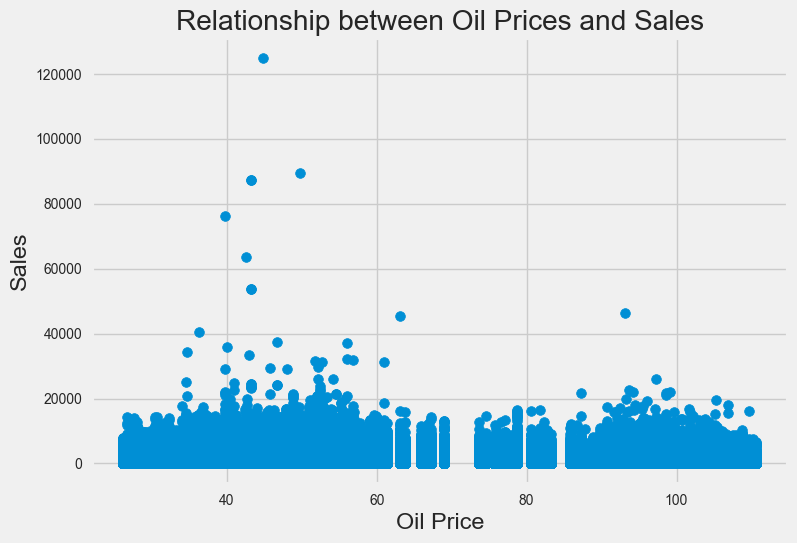

In [61]:
# Plot a scatter plot to visualize the relationship between oil prices and sales
plt.scatter(sales_time_series_df['dcoilwtico'], sales_time_series_df['sales'])
plt.xlabel('Oil Price')
plt.ylabel('Sales')
plt.title('Relationship between Oil Prices and Sales')
plt.show()

In [62]:
data = sales_time_series_df

# create a column to indicate if a day is a holiday or not
data['is_holiday'] = data['type'].apply(lambda x: 1 if x in ['Holiday', 'Bridge'] else 0)

# create a column to indicate if a day is a promotion day or not
data['is_promotion'] = data['onpromotion'].apply(lambda x: 1 if x == True else 0)

# calculate the total sales for regular days and holidays
regular_sales = data[data['is_holiday'] == 0]['sales'].sum()
holiday_sales = data[data['is_holiday'] == 1]['sales'].sum()

# calculate the total sales for promotion days and non-promotion days
promotion_sales = data[data['is_promotion'] == 1]['sales'].sum()
non_promotion_sales = data[data['is_promotion'] == 0]['sales'].sum()

# print the results
print("Sales during regular days: ", regular_sales)
print("Sales during holidays: ", holiday_sales)
print("Sales during promotion days: ", promotion_sales)
print("Sales during non-promotion days: ", non_promotion_sales)

Sales during regular days:  984963746.2185814
Sales during holidays:  111610997.98766968
Sales during promotion days:  83981703.24353021
Sales during non-promotion days:  1012593040.9627197


In [63]:
# on_promo_grp = sales_time_series_df.groupby('onpromotion')
# sales = on_promo_grp['sales'].sum().reset_index()
# sales.set_index('onpromotion', inplace = True)
# sales.sort_index(inplace = True)

# products_on_promo = sales_time_series_df['onpromotion'].value_counts().sort_index()

# sales_per_product = sales['sales']/products_on_promo
# sales['sales_per_product'] = sales_per_product
# total_sales = sales.sort_values(by = 'sales_per_product', ascending = False).reset_index()
# total_sales

In [64]:
oil_prices_grp = sales_time_series_df.groupby('dcoilwtico')
sales = oil_prices_grp['sales'].sum().reset_index()
total_sales = sales.sort_values(by = 'sales', ascending = False)
total_sales

dcoilwtico         sales
192       45.11  3.526948e+06
455       52.36  3.275582e+06
232       46.02  2.868854e+06
556       60.01  2.597800e+06
181       44.75  2.421657e+06
..          ...           ...
792       97.62  2.644888e+05
279       47.26  0.000000e+00
229       45.96  0.000000e+00
284       47.39  0.000000e+00
333       48.59  0.000000e+00

[998 rows x 2 columns]

- during regular days: the total sales during days that are not holidays or promotion days is $984,963,746.22.
- during holidays: the total sales during holidays is $111,610,997.99.
- during promotion days: the total sales during promotion days is $83,981,703.24.
- during non-promotion days: the total sales during days that are not promotion days is $1,012,593,040.96.

### 6. What analysis can we get from the date and its extractable features?

In [65]:
# Extract features from the date column
data['day_of_week'] = data['date'].dt.day_name()
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Analyze the relationship between the extracted features and sales
sales_by_day = data.groupby('day_of_week')['sales'].mean()
sales_by_month = data.groupby('month')['sales'].mean()
sales_by_year = data.groupby('year')['sales'].mean()

# Print the results
print("Average sales by day of the week:")
print(sales_by_day)
print("\nAverage sales by month:")
print(sales_by_month)
print("\nAverage sales by year:")
print(sales_by_year)

Average sales by day of the week:
day_of_week
Friday       324.065160
Monday       345.315011
Saturday     431.265278
Sunday       461.026383
Thursday     283.121663
Tuesday      317.330330
Wednesday    326.747620
Name: sales, dtype: float64

Average sales by month:
month
1     341.921554
2     320.928869
3     352.009294
4     341.167844
5     345.652814
6     352.511265
7     376.414091
8     302.206208
9     362.297418
10    362.407132
11    376.889143
12    457.383116
Name: sales, dtype: float64

Average sales by year:
year
2013    216.692612
2014    323.056936
2015    371.822296
2016    446.518917
2017    449.997780
Name: sales, dtype: float64


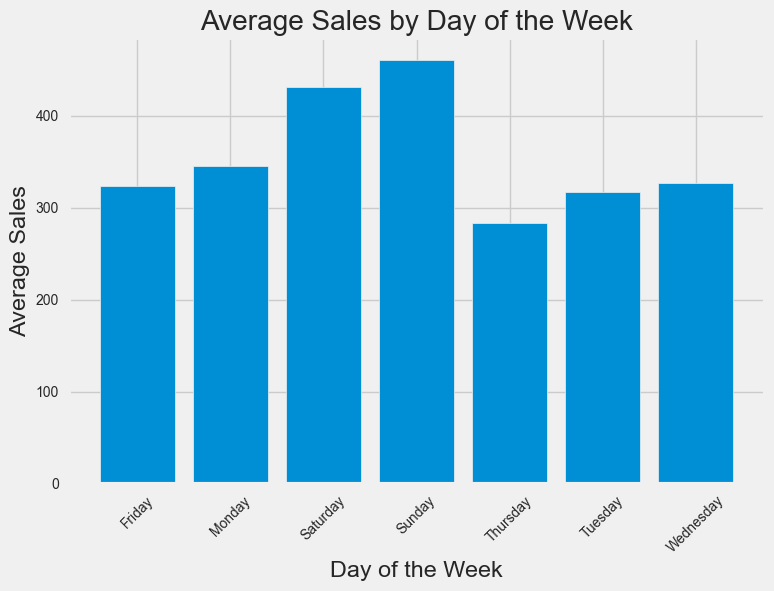

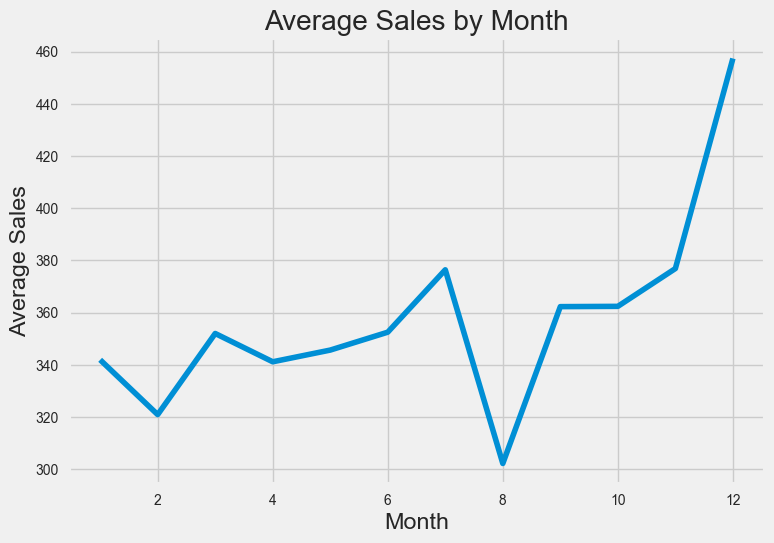

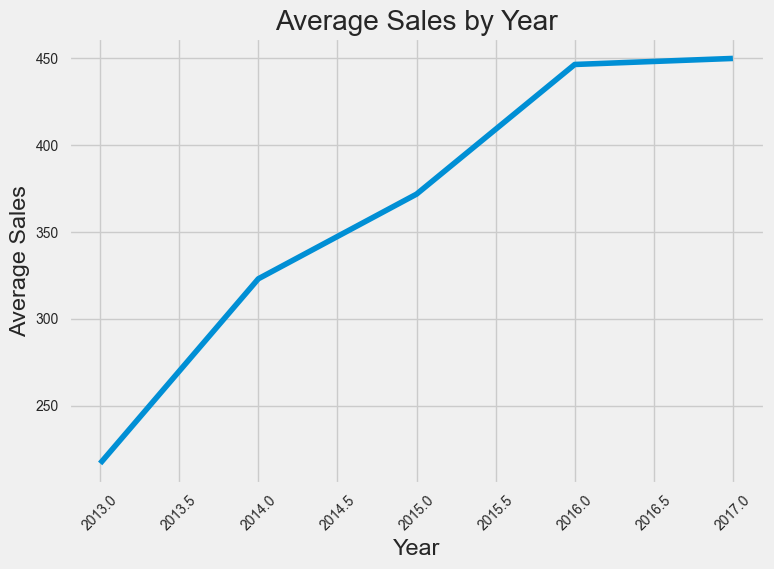

In [66]:
# Plot average sales by day of the week
fig, ax = plt.subplots()
ax.bar(sales_by_day.index, sales_by_day.values)
ax.set_title('Average Sales by Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Average Sales')

plt.xticks(rotation=45)
plt.show()

# Plot average sales by month
fig, ax = plt.subplots()
ax.plot(sales_by_month.index, sales_by_month.values)
ax.set_title('Average Sales by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Sales')
plt.show()

# Plot average sales by year
fig, ax = plt.subplots()
ax.plot(sales_by_year.index, sales_by_year.values)
ax.set_title('Average Sales by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Average Sales')

plt.xticks(rotation=45)
plt.show()

The output above summarizes the average sales by day of the week, month, and year.

For the day of the week, it shows the average sales for each day, where Sunday has the highest average sales and Thursday has the lowest.

For the month, it shows the average sales for each month, where December has the highest average sales and February has the lowest.

For the year, it shows the average sales for each year, where 2017 has the highest average sales and 2013 has the lowest.

In [67]:
# # extract the day of the week as a new column
# data['day_of_week'] = data['date'].apply(lambda x: x.strftime('%A'))

# data.head(10)

In [68]:
data['day_of_week'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

### 7. What is the relationship between product and sales?

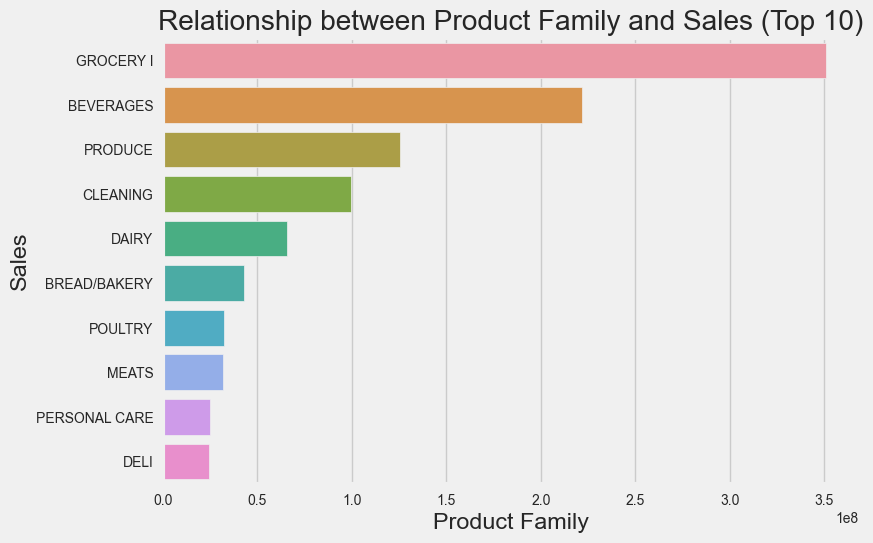

In [69]:
# Group data by product family and sum the sales
grouped_data_1 = sales_time_series_df.groupby('family').sum()['sales']

# Sort the data by sales
grouped_data_1 = grouped_data_1.sort_values(ascending=False)

# Plot the top 10 product families
sns.barplot(x = grouped_data_1.values[:10], y = grouped_data_1.index[:10])
# plt.barh(grouped_data_1.index[:10], grouped_data_1.values[:10])

# Add labels and title
plt.xlabel('Product Family')
plt.ylabel('Sales')
plt.title('Relationship between Product Family and Sales (Top 10)')

# Show the plot
plt.show()

### 8. What is the trend of sales overtime

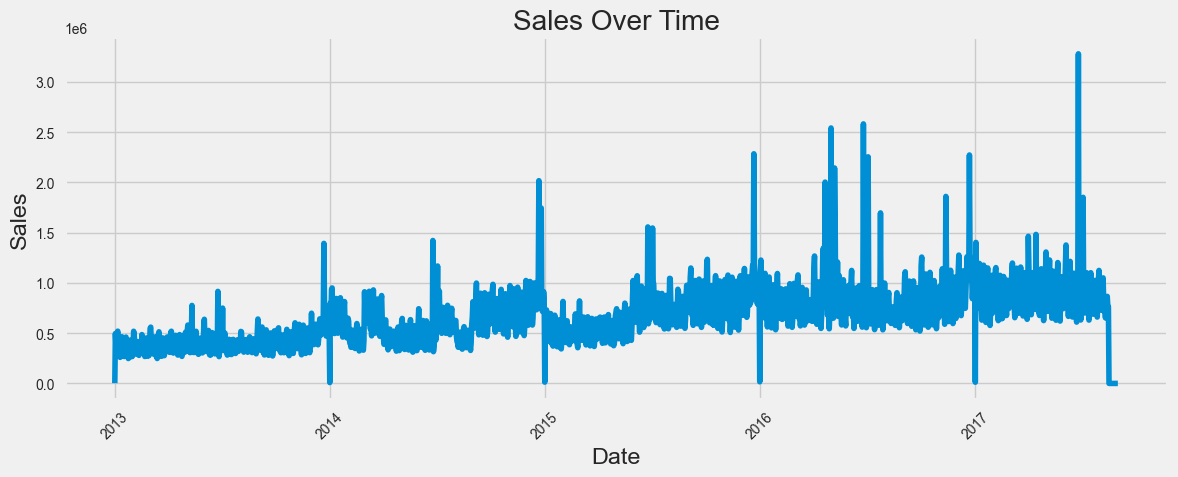

In [70]:
# Group data by date and sum the sales
date_group = sales_time_series_df.groupby('date').sum()

# Plot the sales over time
plt.figure(figsize=(12,5))
plt.plot(date_group.index, date_group['sales'])

plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature Processing & Engineering
Involves **cleaning** and **processing** the dataset and, **creating new features**

In [71]:
data.isna().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
store_type            0
cluster               0
type            2578554
locale          2578554
locale_name     2578554
description     2578554
transferred     2578554
transactions     277629
dcoilwtico       885654
is_holiday            0
is_promotion          0
day_of_week           0
month                 0
year                  0
dtype: int64

In [72]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Identify columns with missing values
missing_cols = data.columns[data.isnull().any()].tolist()

# Create a new dataframe to store the imputed data
impute_data = data.copy()

# Encode categorical variables using OrdinalEncoder
categorical_cols = impute_data.select_dtypes(include=['object']).columns.tolist()
encoder = OrdinalEncoder()
impute_data[categorical_cols] = encoder.fit_transform(impute_data[categorical_cols])

# Impute missing numerical values using IterativeImputer
imputer = IterativeImputer()
impute_data[missing_cols] = imputer.fit_transform(impute_data[missing_cols])

# Decode categorical variables back to their original values
impute_data[categorical_cols] = encoder.inverse_transform(impute_data[categorical_cols].round().astype(int))

# # Save the imputed data to a new CSV file
# impute_data.to_csv('imputed_data.csv', index=False)

In [73]:
sales_time_series_df = impute_data
sales_time_series_df.head(10)

id       date  store_nbr        family  sales  onpromotion   city  \
0   0 2013-01-01          1    AUTOMOTIVE    0.0            0  Quito   
1   1 2013-01-01          1     BABY CARE    0.0            0  Quito   
2   2 2013-01-01          1        BEAUTY    0.0            0  Quito   
3   3 2013-01-01          1     BEVERAGES    0.0            0  Quito   
4   4 2013-01-01          1         BOOKS    0.0            0  Quito   
5   5 2013-01-01          1  BREAD/BAKERY    0.0            0  Quito   
6   6 2013-01-01          1   CELEBRATION    0.0            0  Quito   
7   7 2013-01-01          1      CLEANING    0.0            0  Quito   
8   8 2013-01-01          1         DAIRY    0.0            0  Quito   
9   9 2013-01-01          1          DELI    0.0            0  Quito   

       state store_type  cluster  ... locale_name         description  \
0  Pichincha          D       13  ...     Ecuador  Primer dia del ano   
1  Pichincha          D       13  ...     Ecuador  Primer dia del ano   
2  Pichincha          D       13  ...     Ecuador  Primer dia del ano   
3  Pichincha          D       13  ...     Ecuador  Primer dia del ano   
4  Pichincha          D       13  ...     Ecuador  Primer dia del ano   
5  Pichincha          D       13  ...     Ecuador  Primer dia del ano   
6  Pichincha          D       13  ...     Ecuador  Primer dia del ano   
7  Pichincha          D       13  ...     Ecuador  Primer dia del ano   
8  Pichincha          D       13  ...     Ecuador  Primer dia del ano   
9  Pichincha          D       13  ...     Ecuador  Primer dia del ano   

  transferred transactions dcoilwtico  is_holiday  is_promotion  day_of_week  \
0       False  1547.119207      93.14           1             0      Tuesday   
1       False  1547.119207      93.14           1             0      Tuesday   
2       False  1547.119207      93.14           1             0      Tuesday   
3       False  1547.119207      93.14           1             0      Tuesday   
4       False  1547.119207      93.14           1             0      Tuesday   
5       False  1547.119207      93.14           1             0      Tuesday   
6       False  1547.119207      93.14           1             0      Tuesday   
7       False  1547.119207      93.14           1             0      Tuesday   
8       False  1547.119207      93.14           1             0      Tuesday   
9       False  1547.119207      93.14           1             0      Tuesday   

   month  year  
0      1  2013  
1      1  2013  
2      1  2013  
3      1  2013  
4      1  2013  
5      1  2013  
6      1  2013  
7      1  2013  
8      1  2013  
9      1  2013  

[10 rows x 22 columns]

In [74]:
sales_time_series_df.isna().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
city            0
state           0
store_type      0
cluster         0
type            0
locale          0
locale_name     0
description     0
transferred     0
transactions    0
dcoilwtico      0
is_holiday      0
is_promotion    0
day_of_week     0
month           0
year            0
dtype: int64

In [75]:
sales_time_series_df.corr()

id     store_nbr     sales  onpromotion       cluster  \
id            1.000000  2.985703e-04  0.079719     0.205995 -4.329408e-05   
store_nbr     0.000299  1.000000e+00  0.041062     0.007740 -5.928399e-02   
sales         0.079719  4.106211e-02  1.000000     0.421165  3.833944e-02   
onpromotion   0.205995  7.739773e-03  0.421165     1.000000  5.734068e-03   
cluster      -0.000043 -5.928399e-02  0.038339     0.005734  1.000000e+00   
transactions -0.032010  1.803996e-01  0.211690     0.024895  1.874742e-01   
dcoilwtico   -0.688271  5.186957e-03 -0.049434    -0.134984  4.087290e-03   
is_holiday    0.008603 -7.829984e-16  0.000669     0.002424  4.377963e-16   
is_promotion  0.143067  1.966617e-03  0.024371    -0.033508  3.233236e-03   
month         0.074048 -4.973560e-15  0.018638     0.026923  4.320017e-15   
year          0.978217  2.074319e-14  0.075581     0.199046  4.088561e-14   

              transactions  dcoilwtico    is_holiday  is_promotion  \
id               -0.032010   -0.688271  8.602967e-03      0.143067   
store_nbr         0.180400    0.005187 -7.829984e-16      0.001967   
sales             0.211690   -0.049434  6.690475e-04      0.024371   
onpromotion       0.024895   -0.134984  2.424404e-03     -0.033508   
cluster           0.187474    0.004087  4.377963e-16      0.003233   
transactions      1.000000    0.047115 -1.611274e-02      0.026733   
dcoilwtico        0.047115    1.000000  4.269918e-02     -0.112318   
is_holiday       -0.016113    0.042699  1.000000e+00      0.000553   
is_promotion      0.026733   -0.112318  5.527945e-04      1.000000   
month             0.045997    0.001206  7.759363e-02      0.026836   
year             -0.041297   -0.684044 -5.551831e-03      0.136551   

                     month          year  
id            7.404786e-02  9.782171e-01  
store_nbr    -4.973560e-15  2.074319e-14  
sales         1.863770e-02  7.558132e-02  
onpromotion   2.692259e-02  1.990461e-01  
cluster       4.320017e-15  4.088561e-14  
transactions  4.599663e-02 -4.129747e-02  
dcoilwtico    1.205809e-03 -6.840442e-01  
is_holiday    7.759363e-02 -5.551831e-03  
is_promotion  2.683635e-02  1.365512e-01  
month         1.000000e+00 -1.338153e-01  
year         -1.338153e-01  1.000000e+00

In [76]:
sales_time_series_df.drop(['store_nbr', 'description', 'is_holiday', 'is_promotion', 'date', 'family'], axis=1, inplace= True)

In [77]:
ohe = OneHotEncoder()
ohe.fit(sales_time_series_df.select_dtypes(include=['object', 'bool']))
categorical_columns = sales_time_series_df.select_dtypes(include=['object', 'bool']).columns
X_ohe = pd.DataFrame(ohe.transform(sales_time_series_df.select_dtypes(include=['object', 'bool'])).toarray(),
                     columns=ohe.get_feature_names_out(categorical_columns))
X_ohe.index = sales_time_series_df.index

# Combine one-hot encoded features with numerical features
sales_1hot = pd.concat([sales_time_series_df.select_dtypes(include=['float64', 'int64']), X_ohe], axis=1)

In [78]:
# from sklearn.preprocessing import OneHotEncoder

# # Select the categorical columns
# categorical_columns = ['family', 'type', 'locale_name', 'city', 'state', 'store_type']
# categorical_data = sales_time_series_df[categorical_columns]

# # Initialize the OneHotEncoder
# encoder = OneHotEncoder()

# # Fit and transform the data to one hot encoding
# one_hot_encoded_data = encoder.fit_transform(categorical_data)

# # Get the categories for each column
# categories = [encoder.categories_[i] for i in range(len(encoder.categories_))]

# # Create the column names for the one hot encoded data
# column_names = []
# for i in range(len(categories)):
#     for j in range(len(categories[i])):
#         column_names.append(f'{categorical_columns[i]}_{categories[i][j]}')

# # Convert the one hot encoding data to a DataFrame
# one_hot_encoded_data = pd.DataFrame(one_hot_encoded_data.toarray(), columns=column_names)

# # Concatenate the original dataframe with the one hot encoded data
# new_merged_data_encoded = pd.concat([sales_time_series_df, one_hot_encoded_data], axis=1)

# # Drop the original categorical columns
# new_merged_data_encoded.drop(categorical_columns, axis=1, inplace=True)

In [79]:
sales_1hot.columns

Index(['sales', 'transactions', 'dcoilwtico', 'month', 'year', 'city_Ambato',
       'city_Babahoyo', 'city_Cayambe', 'city_Cuenca', 'city_Daule',
       'city_El Carmen', 'city_Esmeraldas', 'city_Guaranda', 'city_Guayaquil',
       'city_Ibarra', 'city_Latacunga', 'city_Libertad', 'city_Loja',
       'city_Machala', 'city_Manta', 'city_Playas', 'city_Puyo',
       'city_Quevedo', 'city_Quito', 'city_Riobamba', 'city_Salinas',
       'city_Santo Domingo', 'state_Azuay', 'state_Bolivar',
       'state_Chimborazo', 'state_Cotopaxi', 'state_El Oro',
       'state_Esmeraldas', 'state_Guayas', 'state_Imbabura', 'state_Loja',
       'state_Los Rios', 'state_Manabi', 'state_Pastaza', 'state_Pichincha',
       'state_Santa Elena', 'state_Santo Domingo de los Tsachilas',
       'state_Tungurahua', 'store_type_A', 'store_type_B', 'store_type_C',
       'store_type_D', 'store_type_E', 'type_Additional', 'type_Bridge',
       'type_Event', 'type_Holiday', 'type_Transfer', 'type_Work Day',
       '

In [80]:
X = sales_1hot.drop(columns='sales')
y = sales_1hot['sales']

In [81]:
X.shape

(3082860, 89)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [83]:
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler on the training set
scaler.fit(X_train)

# transform the training set
X_train_scaled = scaler.transform(X_train)

# transform the test set
X_test_scaled = scaler.transform(X_test)

### 9. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)

In [84]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score

# Fit the ARIMA model on the training data
model = ARIMA(endog=y_train, order=(1, 1, 1)).fit()

# Make predictions on the test data
y_pred = model.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)

# Calculate the mean absolute error of the predictions
mae = np.mean(np.abs(y_pred - y_test))

# Calculate the root mean squared error (RMSE) of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate the ROC-AUC score of the predictions
#roc_auc = roc_auc_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
#print(f"ROC-AUC: {roc_auc}")

MAE: 579.0791714933666
RMSE: 1099.6973862370648


In [85]:
from sklearn.linear_model import LinearRegression

# Fit the linear regression model on the training data
model = LinearRegression().fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the mean absolute error (MAE) of the predictions
mae = mean_absolute_error(y_test, y_pred)

# Calculate the root mean squared error (RMSE) of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate the ROC-AUC score of the predictions
#roc_auc = roc_auc_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
#print(f"ROC-AUC: {roc_auc}")

MemoryError: Unable to allocate 1.43 GiB for an array with shape (192062178,) and data type float64

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score

# Determine the appropriate order and seasonal order for the SARIMA model

# Fit the SARIMA model on the training data
model = SARIMAX(endog=y_train, order=(1, 0, 1), seasonal_order=(0, 0, 0, 12)).fit()

# Make predictions on the test data
y_pred = model.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)

# Calculate the mean absolute error (MAE) of the predictions 
mae = mean_absolute_error(y_test, y_pred)

# Calculate the root mean squared error (RMSE) of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate the ROC-AUC score of the predictions
#roc_auc = roc_auc_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
#print(f"ROC-AUC: {roc_auc}")

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# initialize the ETS model with additive trend, seasonality, and error components
model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12)

# fit the model to the training set
results = model.fit()

# make predictions on the test set
y_pred = results.forecast(len(y_test))

# calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)